In [335]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import albumentations as A
import cv2
import torch
from torch.utils.data import Dataset
import os
import io
import torch
from torchvision import transforms

len()

In [193]:
import xml.etree.ElementTree as ET

# Parse XML file
tree = ET.parse('D:/ilib/ibug_300W_large_face_landmark_dataset/labels_ibug_300W_train.xml')
root = tree.getroot()
box = []
img_size = []
img_path = []
each_img = root.findall('images/image')
for i, img in enumerate(each_img):
    width = int(img.attrib['width'])
    height = int(img.attrib['height'])
    path = img.attrib['file']
    box_top = int(img.find('box').attrib['top'])
    box_left = int(img.find('box').attrib['left'])
    box_height = int(img.find('box').attrib['height'])
    box_width = int(img.find('box').attrib['width'])
    box.append([box_top, box_left, box_width, box_height])
    img_size.append([width, height])
    img_path.append([path])

# Create empty array to hold points for all images
num_images = len(root.findall('images/image'))
points = np.zeros((num_images, 68, 2), dtype=np.float32)

# Loop through images and extract points
for i, image in enumerate(root.findall('images/image')):
    for j, part in enumerate(image.find('box').findall('part')):
        points[i, j, 0] = float(part.attrib['x'])
        points[i, j, 1] = float(part.attrib['y'])

# Print example points for first image

['lfpw/trainset/image_0457.png']

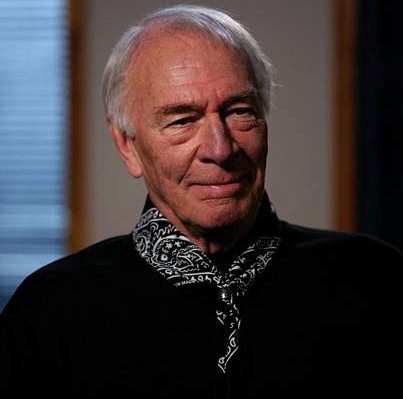

In [194]:
new_path = []
for i in img_path:
    strip_i = str(i)
    new_path.append("D:/ilib/ibug_300W_large_face_landmark_dataset/" + strip_i.strip("[],'"))



In [337]:
transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    A.Normalize()],
    keypoint_params = A.KeypointParams(format='xy',remove_invisible=False)
    )

class FaceLandmarksDataset(Dataset):
    def __init__(self, img_paths, keypoints, transform=None):
        self.img_paths = img_paths
        self.keypoints = keypoints
        self.transform = transform
        
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, index):
        img_path = self.img_paths[index]
        keypoints = self.keypoints[index]
        
        # Load image
        img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            # Apply the same transformation to the image and keypoints
            transform_output = self.transform(image=np.array(img), keypoints=keypoints)
            img = transform_output['image']
            keypoints = transform_output['keypoints']
            
        return img, keypoints
face_dataset = FaceLandmarksDataset(img_paths = new_path, keypoints= points, transform = transform)
dataloader = torch.utils.data.DataLoader(face_dataset, batch_size=32, shuffle=True)

In [329]:
images, keypoints = dataloader

ValueError: too many values to unpack (expected 2)